# SCC0275: Introdução a Ciência de Dados - 1o Semestre de 2021
# SCC0275 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.  Éverton Luís Mendes da Silva (10728171)


In [1]:
import pandas as pd

data = pd.read_csv("dataset_hepatitis.csv", na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

In [3]:
data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


# Questão 1

- a) Mostre que o atributo "BILIRUBIN" contém outliers
- b) Para o atributo citado, calcule a cerca inferior (LF) e superior (UF) para cada um dos atributos. Substitua o valor dos outliers pela cerca mais próxima (consultar Aula 3!). Para ser considerados outlier, os valores devem estar fora dos limites das cercas inferior ou superior.
- c) Compare boxplots de antes e depois da remoção de outliers utilizando as cercas.

In [12]:
def lf_uf(df, nome_attr):
  
  df = df.copy(deep=True)
  
  Q1=df[nome_attr].quantile(0.25)
  Q3=df[nome_attr].quantile(0.75)
  IQR=Q3-Q1

  LB=Q1-1.5*IQR  #lower bound
  UB=Q3+1.5*IQR  #upper bound

  low_outliers=[{index:"LB"} for index,value in enumerate(df[nome_attr]) if value<LB]
  high_outliers=[{index:"UB"} for index,value in enumerate(df[nome_attr]) if value>UB]
  outliers=low_outliers+high_outliers

  for outlier in outliers:

    if (str(*outlier.values()) == "LB"):
        df[nome_attr][int(*outlier.keys())]=LB
    else:
        df[nome_attr][int(*outlier.keys())]=UB

  return df
  

In [13]:
import seaborn as sn

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BILIRUBIN'>

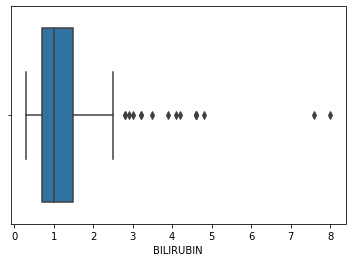

In [14]:
sn.boxplot(data['BILIRUBIN'])

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='BILIRUBIN'>

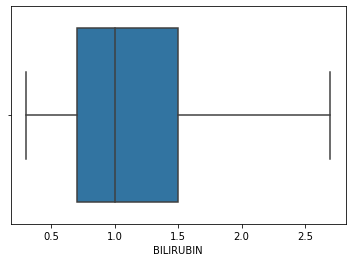

In [16]:
sn.boxplot(lf_uf(data, 'BILIRUBIN')['BILIRUBIN'])

Para os próximos exercícios você pode continuar usando o conjunto de dados sem outliers no atributo analisado, ou usar os dados originais.

### Questão 02. 

Crie uma lista com atributos numéricos e outra com os atributos categóricos da base. Verifique quantos são numéricos e quantos são categóricos.

- Lembre-se de não considerar o atributo classe.

In [31]:
features_numericos = data.drop(columns='Class')._get_numeric_data().columns.tolist()

features_categoricos = [attribute for attribute in data.drop(columns='Class').columns.tolist() if attribute not in data.drop(columns='Class')._get_numeric_data().columns.tolist()]

In [32]:
features_numericos

['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']

In [33]:
features_categoricos

['SEX',
 'STEROID',
 'ANTIVIRALS',
 'FATIGUE',
 'MALAISE',
 'ANOREXIA',
 'LIVER_BIG',
 'LIVER_FIRM',
 'SPLEEN_PALPABLE',
 'SPIDERS',
 'ASCITES',
 'VARICES',
 'HISTOLOGY']

### Questão 03.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média - `mean` (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes - `most_frequent` (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

to better understand what values of my data are missing, I can make a heatmap plot to see the missing values(Nan).

<AxesSubplot:>

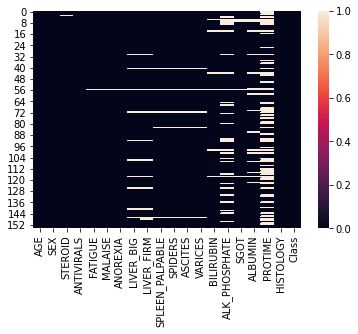

In [35]:
sn.heatmap(data.isna())

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import copy

def transformar_base(df, features_numericos, features_categoricos):
  
    df=copy.deepcopy(df)
    
    pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

    pipeline_categorico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())])

    # Criando a transformação do conjunto de dados:
    transformacao = ColumnTransformer(
        transformers=[
            ('transformacao numerica', pipeline_numerico, features_numericos),
            ('transformacao categorica', pipeline_categorico, features_categoricos),        
        ])

    transformed_df = pd.DataFrame(transformacao.fit_transform(df))


    return transformed_df

In [42]:
transformed_df=transformar_base(data, features_numericos, features_categoricos)

In [44]:
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.894192,-0.360938,-4.394144e-01,-0.769834,0.297246,-4.146013e-16,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.702579,-0.445364,6.415347e-01,-0.497704,-0.516084,-4.146013e-16,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2.938059,-0.614217,-2.016056e-01,-0.611092,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.814353,-0.614217,-1.282555e+00,-0.384316,0.297246,1.058919e+00,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.574838,-0.360938,-3.072242e-16,1.293820,0.297246,-4.146013e-16,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Questão 04

Compare o número de atributos antes e depois do pre-processamento. 


Resposta:

In [45]:
print('Before the pre-processing the Dataframe had shape {}, after the pipeline the transformed data acquired a shape of {}'.format(data.shape, transformed_df.shape))

Before the pre-processing the Dataframe had shape (155, 20), after the pipeline the transformed data acquired a shape of (155, 32)


This occurs because the OneHotEnconder create a new column for each categoric type in categorical_features(example: the 'sex' column have two categorical types male and female, so the OneHotEncoder create two columns)

### Questão 05

Cite uma vantagem e uma desvantagem do pre-processamento realizado

Resposta: 

One of the advantages of pre-processing is the replacement of unfilled values. Since, many machine learning techniques fail to interpret this type of value, and others use this data inappropriately to generate noisy predictions.

A drawback of this type of categorical data transformation, using OneHotEncoder, is the increase in the number of columns (where many of them are sparse) to be handled by ML.